In [31]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [32]:
df = pd.read_csv('./data/decisive_centered.csv')

In [33]:
columns_no_arena = [
    "Self_LV",
    "Direct_Report_LV",
    "Boss_LV",
    "Peer_LV",
    "reputation_LV",
    "Self_Avg",
    "Direct_Report_Avg",
    "Boss_Avg",
    "Peer_Avg",
    "Inf_Avg"
]

In [34]:
import matplotlib.pyplot as plt


def determine_num_clusters(data, max_clusters=10):
    """
    Determine the optimal number of clusters using the Elbow Method.

    Parameters:
        data (DataFrame or array-like): Data to be clustered.
        max_clusters (int): Maximum number of clusters to try.

    Returns:
        int: Optimal number of clusters.
    """
    distortions = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    # Plot the Elbow Method graph
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.show()

    # Choose the optimal number of clusters using the Elbow Method
    distortions_diff = np.diff(distortions, 2)
    optimal_num_clusters = np.argmax(distortions_diff) + 2

    return optimal_num_clusters

In [45]:
def get_cluster_stats(data, cluster_labels):
    """
    Get statistics of each column per cluster.

    Parameters:
        data (DataFrame or array-like): Data used for clustering.
        cluster_labels (array-like): Cluster labels assigned to each data point.

    Returns:
        DataFrame: Statistics of each column per cluster.
    """
    # Add cluster labels to the DataFrame
    df_clustered = pd.DataFrame(data, columns=data.columns)
    df_clustered['cluster_label'] = cluster_labels

    # Group by cluster labels and calculate statistics for each cluster
    cluster_stats = df_clustered.groupby('cluster_label').agg(['mean', 'std'])

    return cluster_stats

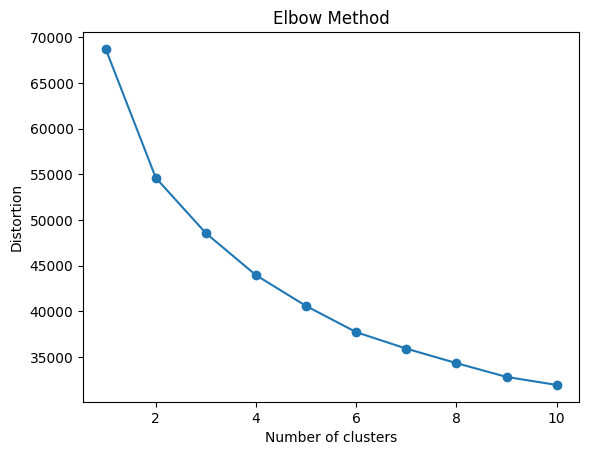

Optimal number of clusters: 2

Counts of data points in each cluster:
cluster_label
1    4246
0    2628
Name: count, dtype: int64


In [36]:
# Generate sample data (replace this with your actual dataset)
# Assuming you have a DataFrame called df with 10 columns
# Replace df with your actual DataFrame
# Example data generation:


# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[columns_no_arena])

optimal_num_clusters = determine_num_clusters(scaled_data)
print("Optimal number of clusters:", optimal_num_clusters)

# Perform KMeans clustering
n_clusters = 5  # You can change the number of clusters as per your requirement
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to the DataFrame
df['cluster_label'] = kmeans.labels_

# # Output the cluster centers
# cluster_centers = pd.DataFrame(
#     kmeans.cluster_centers_, columns=df.columns[:-1])
# print("Cluster Centers:")
# print(cluster_centers)

# Output the counts of data points in each cluster
print("\nCounts of data points in each cluster:")
print(df['cluster_label'].value_counts())

In [53]:
cluster_stats = get_cluster_stats(df, kmeans.labels_)
print("Statistics of each column per cluster:")
print(cluster_stats)

Statistics of each column per cluster:
                 ESI_Key              BMK_S1_34_mean_Self            \
                    mean          std                mean       std   
cluster_label                                                         
0              48.387905  2509.041946           -0.249820  0.794780   
1             -29.948991  2609.845042            0.154622  0.786014   

              BMK_S1_34_mean_Direct_Report           BMK_S1_34_mean_Peer  \
                                      mean       std                mean   
cluster_label                                                              
0                                -0.337967  0.581860           -0.354444   
1                                 0.209179  0.443385            0.219378   

                        BMK_S1_34_mean_Boss            ...   Inf_Avg  \
                    std                mean       std  ...      mean   
cluster_label                                          ...             
0       

In [47]:
cluster_stats.to_csv('./data/cluster_stats.csv')

## Anamoly Detectino

In [49]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Sample data (replace this with your actual dataset)
# Assuming you have a DataFrame called df
# Replace df with your actual DataFrame
# Example data generation:

df = pd.read_csv("./data/decisive_centered.csv")

# Columns to use for anomaly detection
columns_for_anomaly_detection = ["Self_LV", "Direct_Report_LV", "Boss_LV", "Peer_LV", "reputation_LV",
                                 "arena_LV", "Self_Avg", "Direct_Report_Avg", "Boss_Avg",
                                 "Peer_Avg", "Inf_Avg"]

# Standardize the selected columns only
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[columns_for_anomaly_detection])

# Perform anomaly detection using Isolation Forest
# Contamination is the expected proportion of outliers
clf = IsolationForest(random_state=0, contamination=0.05)
clf.fit(scaled_data)

# Predict outliers
outliers = clf.predict(scaled_data)

# Add outlier label to the DataFrame
df['is_outlier'] = outliers

# Output the counts of outliers
print("Counts of outliers:")
print(df['is_outlier'].value_counts())

Counts of outliers:
is_outlier
 1    6530
-1     344
Name: count, dtype: int64


In [52]:
cluster_stats_anamoly = get_cluster_stats(df, outliers)
print("Statistics of each column per cluster:")
print(cluster_stats_anamoly)

Statistics of each column per cluster:
                  ESI_Key              BMK_S1_34_mean_Self            \
                     mean          std                mean       std   
cluster_label                                                          
-1             116.413015  2417.755978           -0.324662  0.999284   
 1              -6.132631  2579.764266            0.017103  0.798883   

              BMK_S1_34_mean_Direct_Report           BMK_S1_34_mean_Peer  \
                                      mean       std                mean   
cluster_label                                                              
-1                               -0.775474  0.850544           -0.733716   
 1                                0.040852  0.516831            0.038652   

                        BMK_S1_34_mean_Boss            ...   Inf_Avg  \
                    std                mean       std  ...      mean   
cluster_label                                          ...             
-1 

In [51]:
cluster_stats_anamoly.to_csv('./data/anomaly_stats.csv')